In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Data_for_Values.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,45000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [4]:
df_new = df[['Age', 'Salary']]
df_new

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,45000
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


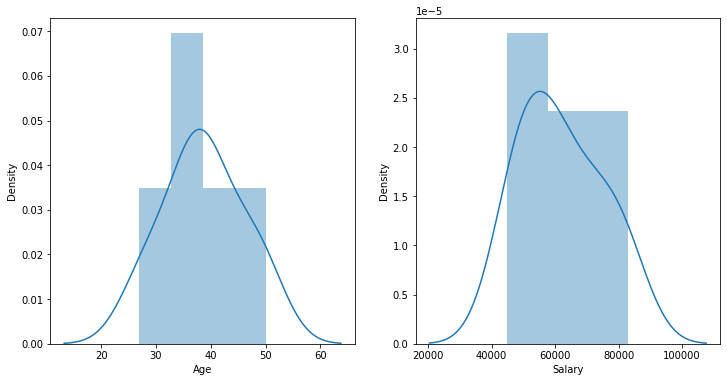

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df_new['Age'])
plt.subplot(1,2,2)
sns.distplot(df_new['Salary'])
plt.show()

In [6]:
# không phải là phân phối chuẩn -> không sử dụng StandardScaler

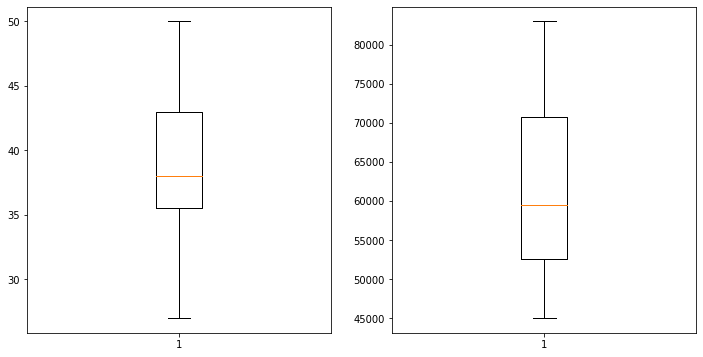

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_new['Age'])
plt.subplot(1,2,2)
plt.boxplot(df_new['Salary'])
plt.show()

In [8]:
# không có outlier -> dùng MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
df_scale = scaler.fit_transform(df_new)
df_scale

array([[0.73913043, 0.71052632],
       [0.        , 0.07894737],
       [0.13043478, 0.23684211],
       [0.47826087, 0.42105263],
       [0.56521739, 0.        ],
       [0.34782609, 0.34210526],
       [0.47826087, 0.18421053],
       [0.91304348, 0.89473684],
       [1.        , 1.        ],
       [0.43478261, 0.57894737]])

In [12]:
df_scale = pd.DataFrame(df_scale, columns=df_new.columns)
df_scale

,Age,Salary
0,0.739130,0.710526
1,0.000000,0.078947
2,0.130435,0.236842
3,0.478261,0.421053
4,0.565217,0.000000
5,0.347826,0.342105
6,0.478261,0.184211
7,0.913043,0.894737
8,1.000000,1.000000
9,0.434783,0.578947


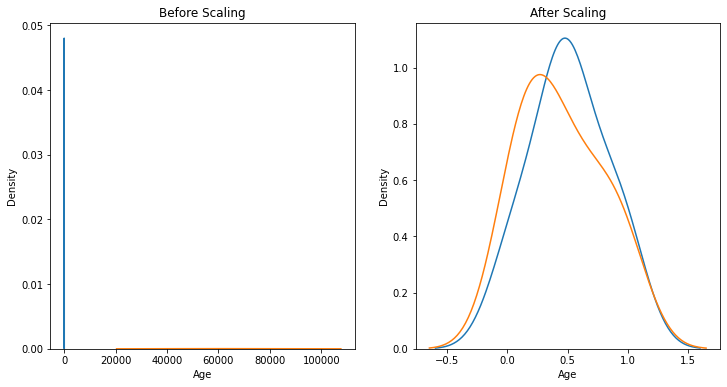

In [13]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(df_new['Age'], ax=ax1)
sns.kdeplot(df_new['Salary'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(df_scale['Age'], ax=ax2)
sns.kdeplot(df_scale['Salary'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

In [14]:
print('Before Scaling')
print('Age min:', df_new['Age'].min(), ' - Age max:', df_new['Age'].max())
print('Salary min:', df_new['Salary'].min(), ' - Salary max:', df_new['Salary'].max())

Before Scaling
Age min: 27  - Age max: 50
Salary min: 45000  - Salary max: 83000


In [15]:
print('After Scaling')
print('Age min:', df_scale['Age'].min(), ' - Age max:', df_scale['Age'].max())
print('Salary min:', df_scale['Salary'].min(), ' - Salary max:', df_scale['Salary'].max())

After Scaling
Age min: 0.0  - Age max: 1.0
Salary min: 0.0  - Salary max: 0.9999999999999998


In [16]:
print('Before Scaling')
df_new.corr()

Before Scaling


,Age,Salary
Age,1.00000,0.79338
Salary,0.79338,1.00000


In [17]:
print('After Scaling')
df_scale.corr()

After Scaling


,Age,Salary
Age,1.00000,0.79338
Salary,0.79338,1.00000
